# Sample File monitor

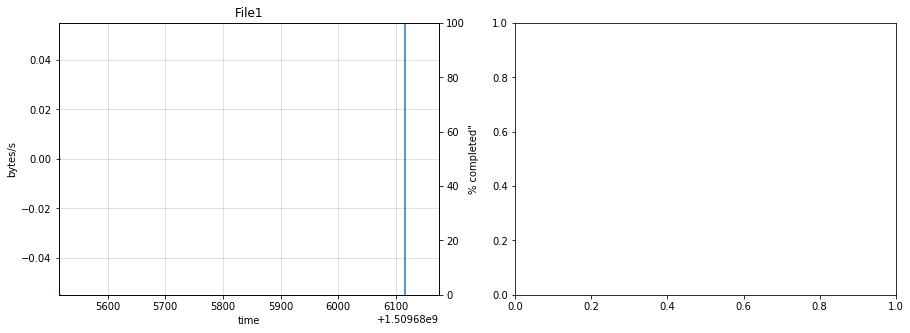

None

In [1]:
import filemon.graph as gr
from filemon import FileMonitor
import subprocess
import time
file_route="/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384"
monitor_output_file="/home/gonzalo/DTN_monitor/output.txt"
fm = FileMonitor()
fm.monitor_file_name_async(file_route, 1587609600,
                                monitor_output_file)
time.sleep(1.0)
mode=0
thread  = gr.DataPlot(["File1"], [monitor_output_file])
thread.set_deadline(time.time()+600)
thread.daemon = True
thread.start()


In [2]:
import filemon.graph as gr
from filemon import FileMonitor
import subprocess
import time

from filemon.orchestrate import monitor_files
# Downloading files by running at /tmp/
# wget http://releases.ubuntu.com/16.04.3/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 

file_routes = [
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.1",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.2",
    "/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.3",
]

rest_ids = ["f1", "f2", "f3", "f4"]
expected_sizes = [1587609600, 1587609600, 1587609600, 1587609600]
titles = ["UbuntuIso_1-1.5GB", "UbuntuIso_2-1.5GB", "UbuntuIso_3-1.5GB", "UbuntuIso_4-1.5GB"]
ref_time = time.time()
deadlines = [ref_time+600, ref_time+400, ref_time+500,  ref_time+700]

monitor_files(file_routes, expected_sizes, titles=titles, deadline_list=deadlines, y_factor=1.0/float(1024*1024),
             y_label="MB/s", y_lim=(0, 20),
             rest_reporting=True, file_ids=rest_ids)



SENDING http://127.0.0.1:5000/api/files/monitor.0.ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 {"timestamp": 1509685903.6396763, "completion": 0.0, "rate": 0.0, "received": 0}
SENDING http://127.0.0.1:5000/api/files/monitor.0.ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 {"timestamp": 1509685904.642614, "completion": 0.0, "rate": 0.0, "received": 0}


Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/mnt/DTN_monitor/filemon/graph.py", line 124, in __run
    self.do_other_actions(data_dict)
  File "/mnt/DTN_monitor/filemon/rest_reporter.py", line 33, in do_other_actions
    time_stamp=data_list["time_stamps"][i]
IndexError: list index out of range



SENDING http://127.0.0.1:5000/api/files/monitor.0.ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 {"timestamp": 1509685904.694588, "completion": 0.0, "rate": 0.0, "received": 0}
SENDING http://127.0.0.1:5000/api/files/monitor.0.ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 {"timestamp": 1509685905.6487582, "completion": 0.0, "rate": 0.0, "received": 0}
SENDING http://127.0.0.1:5000/api/files/monitor.0.ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384 {"timestamp": 1509685905.7000725, "completion": 0.0, "rate": 0.0, "received": 0}


Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/mnt/DTN_monitor/filemon/graph.py", line 124, in __run
    self.do_other_actions(data_dict)
  File "/mnt/DTN_monitor/filemon/rest_reporter.py", line 33, in do_other_actions
    time_stamp=data_list["time_stamps"][i]
IndexError: list index out of range

